## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pylab import rcParams
import seaborn as sns
import time

### Company selection

In [2]:
comp = pd.read_csv('securities.csv')
comp.head()

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877


As referred in report, 5 companies in the airline industry are selected: American Airlines Group, Southwest Airlines, United Continental Holdings, Delta Air Lines, and Alaska Air Group Inc. 

In [3]:
##find corresponding symbol for each company in the order A-Z
comp_5 = comp.loc[(comp['Security'] == 'Alaska Air Group Inc') | 
                  (comp['Security'] == 'American Airlines Group') | 
                  (comp['Security'] == 'Delta Air Lines') | 
                  (comp['Security'] == 'Southwest Airlines') | 
                  (comp['Security'] == 'United Continental Holdings'), ['Ticker symbol']]
print(comp_5)


    Ticker symbol
15            ALK
28            AAL
137           DAL
411           LUV
458           UAL


## Read Data

In [4]:
df = pd.read_csv('prices-split-adjusted.csv')

In [5]:
df.head().round(3)

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.43,125.84,122.31,126.25,2163600.0
1,2016-01-06,WLTW,125.24,119.98,119.94,125.54,2386400.0
2,2016-01-07,WLTW,116.38,114.95,114.93,119.74,2489500.0
3,2016-01-08,WLTW,115.48,116.62,113.50,117.44,2006300.0
4,2016-01-11,WLTW,117.01,114.97,114.09,117.33,1408600.0


In [6]:
#check the shape of loaded dataset
print(df.shape)

(851264, 7)


### check data quality

Find out if there are missing data:

In [7]:
#there are no missing data. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [8]:
df[df.isnull().any(axis=1)]

,date,symbol,open,close,low,high,volume


In [9]:
##find out unique symbols info
q = df.symbol.unique()
print("number of unique symbols:", len(q))
print("first 10 unique symbols are:", q[0:10])

number of unique symbols: 501
first 10 unique symbols are: ['WLTW' 'A' 'AAL' 'AAP' 'AAPL' 'ABC' 'ABT' 'ACN' 'ADBE' 'ADI']


## Visualization of opening and closing stock prices for each company

In [10]:
def visualization(i):
    company_data = df.loc[df['symbol'] == i]
    company_data_open = np.array(company_data['open']).reshape(-1,1)
    company_data_close = np.array(company_data['close']).reshape(-1,1)
    plt.subplot(2, 1, 1)
    ax = df.plot
    plt.plot(company_data_open)
    plt.xlabel('Time')
    plt.ylabel(i + 'opening stock price')
    
    plt.subplot(2, 1, 2)
    plt.plot(company_data_close)
    plt.xlabel('Time')
    plt.ylabel(i + 'closing stock price')
    
    plt.show()

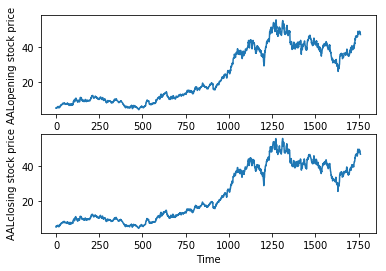

In [11]:
visualization('AAL')

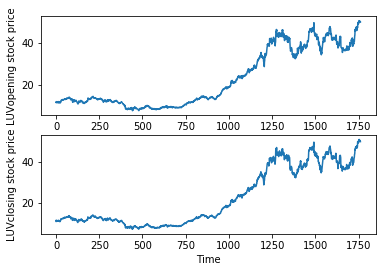

In [12]:
visualization('LUV')

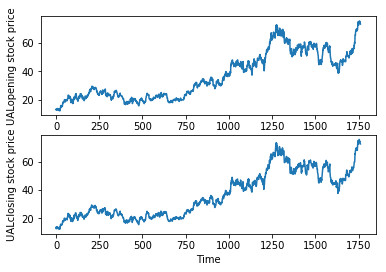

In [13]:
visualization('UAL')

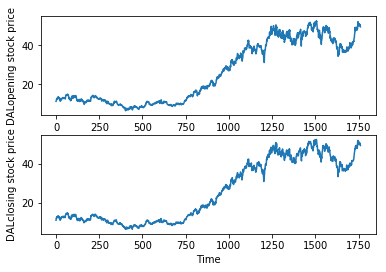

In [14]:
visualization('DAL')

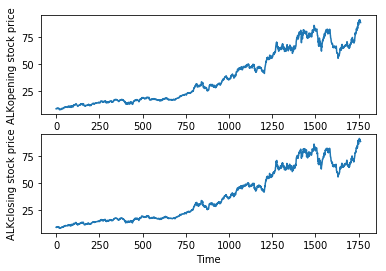

In [15]:
visualization('ALK')

Above plots show that the differences between opening and closing prices are marginal, closing price is selected as explained in the report

To better visualize the stock price over time, adjust the x-axis to date format

In [16]:
df.loc[:,'date']=pd.to_datetime(df['date'],format='%Y-%m-%d')
df['month'] = df['date'].dt.month
df.head()

,date,symbol,open,close,low,high,volume,month
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0,1
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0,1
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0,1
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0,1
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0,1


In [17]:
##generate table for each company
ALK = df.loc[df['symbol'] == 'ALK']
AAL = df.loc[df['symbol'] == 'AAL']
DAL = df.loc[df['symbol'] == 'DAL']
LUV = df.loc[df['symbol'] == 'LUV']
UAL = df.loc[df['symbol'] == 'UAL']

In [18]:
#view summary stats for random company
LUV.describe()

,open,close,low,high,volume,month
count,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03,1762.000000
mean,22.489109,22.489387,22.198649,22.769098,7.711555e+06,6.549943
std,13.780502,13.783337,13.598771,13.954358,3.598728e+06,3.426034
min,7.370000,7.350000,7.150000,7.550000,1.475000e+06,1.000000
25%,11.380000,11.400000,11.230000,11.550000,5.458375e+06,4.000000
50%,13.820000,13.810000,13.690000,13.945000,7.000200e+06,7.000000
75%,37.457499,37.327501,36.777499,37.947501,9.006950e+06,10.000000
max,50.770000,50.889999,50.520000,51.340000,4.382490e+07,12.000000


In [19]:
LUV.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1762 entries, 516 to 851045
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1762 non-null   datetime64[ns]
 1   symbol  1762 non-null   object        
 2   open    1762 non-null   float64       
 3   close   1762 non-null   float64       
 4   low     1762 non-null   float64       
 5   high    1762 non-null   float64       
 6   volume  1762 non-null   float64       
 7   month   1762 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 123.9+ KB


## train and test set split

In [20]:
test_size=0.2
num_test = int(test_size*len(df))
num_train = len(df) - num_test

##split dataset
train = df[:num_train]
test = df[num_train:]
print("shape of train:",train.shape)
print("shape of test:", test.shape)

shape of train: (681012, 8)
shape of test: (170252, 8)


In [21]:
##create table for each comopany
#AAL
AALtrain = train.loc[train['symbol'] == 'AAL']
AALtest = test.loc[test['symbol'] == 'AAL']
#LUV
LUVtrain = train.loc[train['symbol'] == 'LUV']
LUVtest = test.loc[test['symbol'] == 'LUV']
#UAL
UALtrain = train.loc[train['symbol'] == 'UAL']
UALtest = test.loc[test['symbol'] == 'UAL']
#DAL
DALtrain = train.loc[train['symbol'] == 'DAL']
DALtest = test.loc[test['symbol'] == 'DAL']
#ALK
ALKtrain = train.loc[train['symbol'] == 'ALK']
ALKtest = test.loc[test['symbol'] == 'ALK']

example: plot AAL train dataset close price over time

Text(0,0.5,'price')

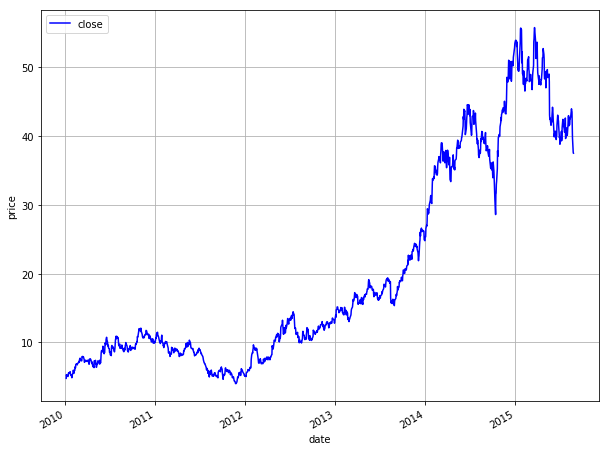

In [22]:
rcParams['figure.figsize']=10, 8
ax=AALtrain.plot(x='date', y='close', style='b-', grid=True)
ax.set_xlabel('date')
ax.set_ylabel('price')

In [23]:
##view summary stats for random company
LUVtrain.describe()

,open,close,low,high,volume,month
count,1421.000000,1421.000000,1421.000000,1421.000000,1.421000e+03,1421.000000
mean,17.852716,17.847213,17.619986,18.071809,7.910026e+06,6.308234
std,10.987154,10.978176,10.829118,11.122443,3.563757e+06,3.377952
min,7.370000,7.350000,7.150000,7.550000,1.475000e+06,1.000000
25%,10.360000,10.310000,10.240000,10.430000,5.574400e+06,3.000000
50%,12.880000,12.860000,12.720000,13.020000,7.259300e+06,6.000000
75%,23.600000,23.600000,23.280001,23.889999,9.324900e+06,9.000000
max,46.619999,46.990002,46.020000,47.169998,3.628340e+07,12.000000


### Feature Scaling

In [24]:
#normalization
def normalize(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    data['open'] = scaler.fit_transform(data.open.values.reshape(-1,1))
    data['high'] = scaler.fit_transform(data.high.values.reshape(-1,1))
    data['low'] = scaler.fit_transform(data.low.values.reshape(-1,1))
    data['close'] = scaler.fit_transform(data.close.values.reshape(-1,1))
    data['volume'] = scaler.fit_transform(data.volume.values.reshape(-1,1))
    return data
AALtrain = normalize(AALtrain)
LUVtrain = normalize(LUVtrain)
UALtrain = normalize(UALtrain)
DALtrain = normalize(DALtrain)
ALKtrain = normalize(ALKtrain)

/Users/cjj295347359/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/cjj295347359/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/cjj295347359/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

## Algorithm 1: Linear Regression (Long-term and Short-term)

### 1.1 Long-term prediction ( only 1 independent variable)

y = B0+B1*X, Where X is the time

In [25]:
import math
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error

In [26]:
# we first use the actual data:

#AAL
AALtrain = train.loc[train['symbol'] == 'AAL']
AALtest = test.loc[test['symbol'] == 'AAL']
#LUV
LUVtrain = train.loc[train['symbol'] == 'LUV']
LUVtest = test.loc[test['symbol'] == 'LUV']
#UAL
UALtrain = train.loc[train['symbol'] == 'UAL']
UALtest = test.loc[test['symbol'] == 'UAL']
#DAL
DALtrain = train.loc[train['symbol'] == 'DAL']
DALtest = test.loc[test['symbol'] == 'DAL']
#ALK
ALKtrain = train.loc[train['symbol'] == 'ALK']
ALKtest = test.loc[test['symbol'] == 'ALK']


In [27]:
AAL_data_trainy = AALtrain[['close']]
AAL_data_testy = AALtest[['close']]

ALK_data_trainy = ALKtrain[['close']]
ALK_data_testy = ALKtest[['close']]

DAL_data_trainy = DALtrain[['close']]
DAL_data_testy = DALtest[['close']]

UAL_data_trainy = UALtrain[['close']]
UAL_data_testy = UALtest[['close']]

LUV_data_trainy = LUVtrain[['close']]
LUV_data_testy = LUVtest[['close']]

In [28]:
print(ALKtest.shape)
print(ALKtrain.shape)
print(ALK_data_trainy.shape)
print(ALK_data_testy.shape)

(341, 8)
(1421, 8)
(1421, 1)
(341, 1)


### ALK Long-term

In [29]:
ALK_trainx = np.array(ALKtrain.index).reshape(-1, 1)
ALK_testx = np.array(ALKtest.index).reshape(-1, 1)


In [30]:
regression = LinearRegression()

# Train the model using the training sets
regression.fit(ALK_trainx, ALK_data_trainy)


# The coefficients
print('Coefficients: \n', regression.coef_)

print('Intercept: \n', regression.intercept_)


Coefficients: 
 [[8.7653435e-05]]
Intercept: 
 [-0.02954625]


In [31]:
ALK_train_prediction=regression.predict(ALK_trainx)
ALK_train_prediction1 = ALK_train_prediction.flatten()
print(ALK_train_prediction1.shape)



(1421,)


In [32]:
ALK_train_Y = ALK_data_trainy.values
ALK_train_Y1 = ALK_train_Y.flatten()
ALK_train_Y1.shape

(1421,)

In [33]:
%%time
ALK_price_comparison = pd.DataFrame({'ALK actual price':ALK_train_Y1,'ALK prediction price':ALK_train_prediction1})
ALK_price_comparison.tail(40)

CPU times: user 1.07 ms, sys: 27 µs, total: 1.1 ms
Wall time: 1.09 ms


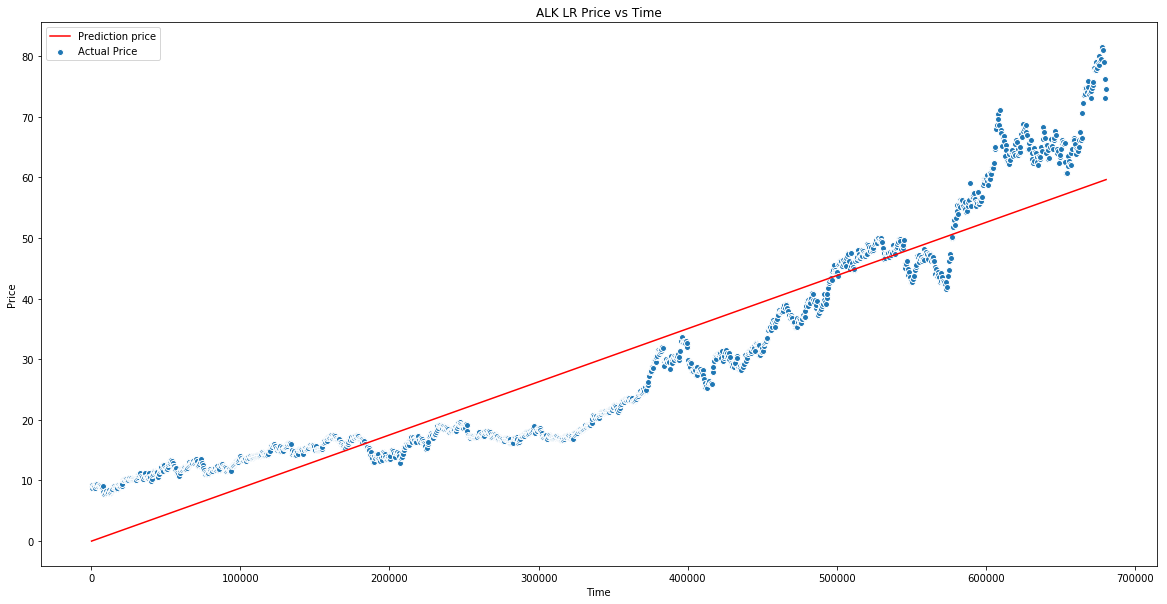

ALK regression score: 
 0.864766806073406
ALK MSE: 
 46.25230240079577


In [34]:
plt.figure(1, figsize=(20,10))
plt.scatter(ALK_trainx, ALK_data_trainy, edgecolor='w', label='Actual Price')
plt.plot(ALK_trainx, ALK_train_prediction, color='r', label='Prediction price')
plt.xlabel('Time')
plt.ylabel('Price')

plt.title('ALK LR Price vs Time')
plt.legend()
plt.show()

print('ALK regression score: \n',regression.score(ALK_trainx,ALK_data_trainy))
ALK_MSE= mean_squared_error(ALK_train_Y1, ALK_train_prediction1)
ALK_MAE = metrics.mean_absolute_error(ALK_train_Y1,ALK_train_prediction1)

print('ALK MSE: \n',ALK_MSE)

### AAL

In [35]:
AAL_trainx = np.array(AALtrain.index).reshape(-1, 1)
AAL_testx = np.array(AALtest.index).reshape(-1, 1)
regression = LinearRegression()

# Train the model using the training sets
regression.fit(AAL_trainx, AAL_data_trainy)


# The coefficients
print('Coefficients: \n', regression.coef_)

print('Intercept: \n', regression.intercept_)


Coefficients: 
 [[6.74780325e-05]]
Intercept: 
 [-2.5441675]


In [36]:
%%time
AAL_train_prediction=regression.predict(AAL_trainx)
AAL_train_prediction1 = AAL_train_prediction.flatten()
AAL_train_Y = AAL_data_trainy.values
AAL_train_Y1 = AAL_train_Y.flatten()

AAL_price_comparison = pd.DataFrame({'AAL actual price':AAL_train_Y1,'AAL prediction price':AAL_train_prediction1})

AAL_price_comparison.tail(40)

CPU times: user 1.1 ms, sys: 118 µs, total: 1.21 ms
Wall time: 1.16 ms


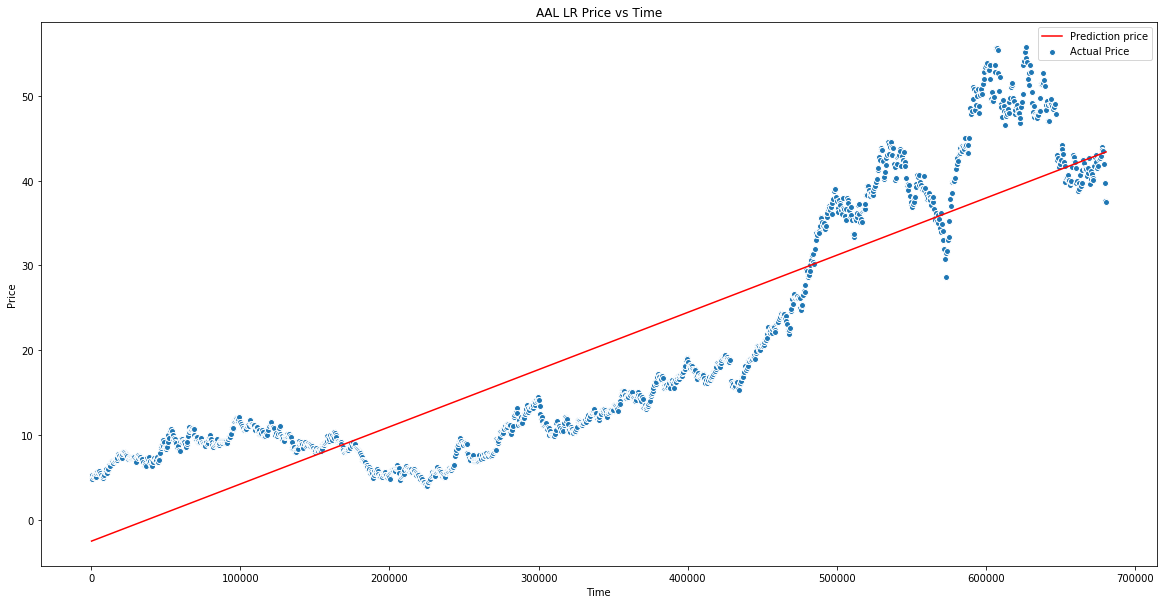

AAL regression score: 
 0.7860964667311117
AAL MSE: 
 47.695368434432645
CPU times: user 610 ms, sys: 29.7 ms, total: 640 ms
Wall time: 640 ms


In [37]:
%%time
plt.figure(1, figsize=(20,10))
plt.scatter(AAL_trainx, AAL_data_trainy, edgecolor='w', label='Actual Price')
plt.plot(AAL_trainx, AAL_train_prediction, color='r', label='Prediction price')
plt.xlabel('Time')
plt.ylabel('Price')

plt.title('AAL LR Price vs Time')
plt.legend()
plt.show()

print('AAL regression score: \n',regression.score(AAL_trainx,AAL_data_trainy))
AAL_MAE = metrics.mean_absolute_error(AAL_train_Y1,AAL_train_prediction1)
AAL_MSE = mean_squared_error(AAL_train_Y1, AAL_train_prediction1)
print('AAL MSE: \n',AAL_MSE)

### LUV

In [38]:
%%time
LUV_trainx = np.array(LUVtrain.index).reshape(-1, 1)
LUV_testx = np.array(LUVtest.index).reshape(-1, 1)
regression = LinearRegression()

# Train the model using the training sets
regression.fit(LUV_trainx, LUV_data_trainy)


# The coefficients
print('Coefficients: \n', regression.coef_)

print('Intercept: \n', regression.intercept_)


LUV_train_prediction=regression.predict(LUV_trainx)
LUV_train_prediction1 = LUV_train_prediction.flatten()
LUV_train_Y = LUV_data_trainy.values
LUV_train_Y1 = LUV_train_Y.flatten()
LUV_price_comparison = pd.DataFrame({'LUV actual price':LUV_train_Y1,'LUV prediction price':LUV_train_prediction1})
LUV_price_comparison.tail(40)

Coefficients: 
 [[4.40325529e-05]]
Intercept: 
 [3.01934879]
CPU times: user 5.24 ms, sys: 1.7 ms, total: 6.94 ms
Wall time: 9.91 ms


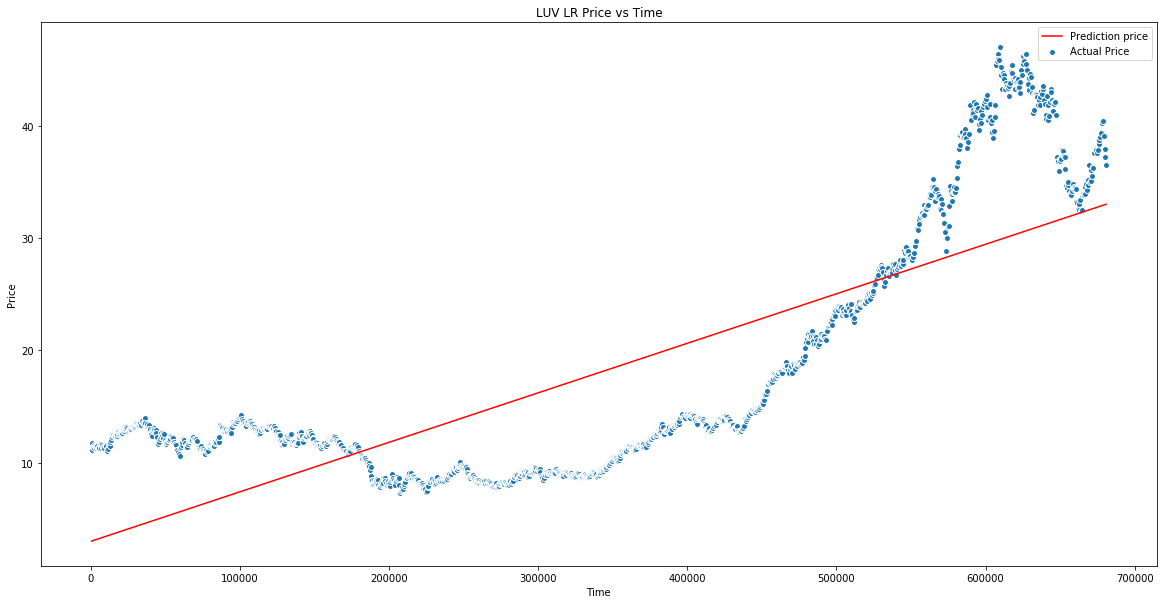

LUV regression score: 
 0.6197592179219403
LUV MSE: 
 45.79450066931411


In [39]:
plt.figure(1, figsize=(20,10))
plt.scatter(LUV_trainx, LUV_data_trainy, edgecolor='w', label='Actual Price')
plt.plot(LUV_trainx, LUV_train_prediction, color='r', label='Prediction price')
plt.xlabel('Time')
plt.ylabel('Price')

plt.title('LUV LR Price vs Time')
plt.legend()
plt.show()

print('LUV regression score: \n',regression.score(LUV_trainx,LUV_data_trainy))
LUV_MAE = metrics.mean_absolute_error(LUV_train_Y1,LUV_train_prediction1)
LUV_MSE = mean_squared_error(LUV_train_Y1, LUV_train_prediction1)
print('LUV MSE: \n',LUV_MSE)

### UAL

In [40]:
%%time
UAL_trainx = np.array(UALtrain.index).reshape(-1, 1)
UAL_testx = np.array(UALtest.index).reshape(-1, 1)
regression = LinearRegression()


regression.fit(UAL_trainx, UAL_data_trainy)

print('Coefficients: \n', regression.coef_)

print('Intercept: \n', regression.intercept_)


UAL_train_prediction=regression.predict(UAL_trainx)
UAL_train_prediction1 = UAL_train_prediction.flatten()
UAL_train_Y = UAL_data_trainy.values
UAL_train_Y1 = UAL_train_Y.flatten()
UAL_price_comparison = pd.DataFrame({'UAL actual price':UAL_train_Y1,'UAL prediction price':UAL_train_prediction1})
UAL_price_comparison.tail(40)

Coefficients: 
 [[6.49674317e-05]]
Intercept: 
 [10.52383939]
CPU times: user 5.6 ms, sys: 1.83 ms, total: 7.43 ms
Wall time: 6.99 ms


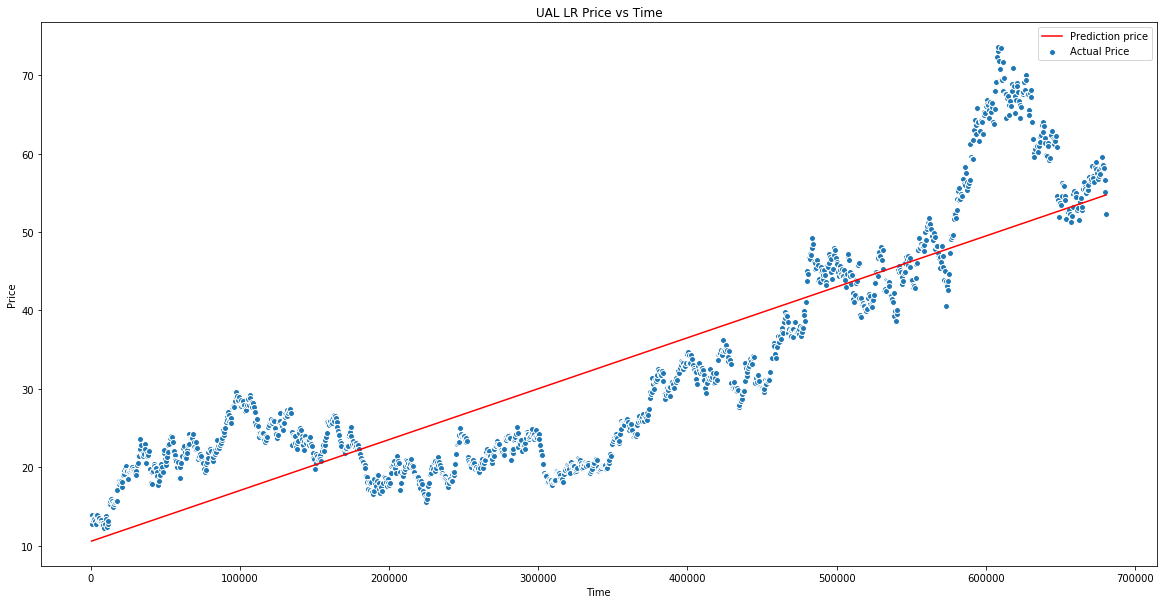

UAL regression score: 
 0.7415346966747935
UAL MSE: 
 56.55539721546345
CPU times: user 663 ms, sys: 32.1 ms, total: 695 ms
Wall time: 800 ms


In [41]:
%%time
plt.figure(1, figsize=(20,10))
plt.scatter(UAL_trainx, UAL_data_trainy, edgecolor='w', label='Actual Price')
plt.plot(UAL_trainx, UAL_train_prediction, color='r', label='Prediction price')
plt.xlabel('Time')
plt.ylabel('Price')

plt.title('UAL LR Price vs Time')
plt.legend()
plt.show()

print('UAL regression score: \n',regression.score(UAL_trainx,UAL_data_trainy))
UAL_MAE = metrics.mean_absolute_error(UAL_train_Y1,UAL_train_prediction1)
UAL_MSE = mean_squared_error(UAL_train_Y1, UAL_train_prediction1)
print('UAL MSE: \n',UAL_MSE)

### DAL

In [42]:
%%time
DAL_trainx = np.array(DALtrain.index).reshape(-1, 1)
DAL_testx = np.array(DALtest.index).reshape(-1, 1)
regression = LinearRegression()


regression.fit(DAL_trainx, DAL_data_trainy)

print('Coefficients: \n', regression.coef_)

print('Intercept: \n', regression.intercept_)


DAL_train_prediction=regression.predict(DAL_trainx)
DAL_train_prediction1 = DAL_train_prediction.flatten()
DAL_train_Y = DAL_data_trainy.values
DAL_train_Y1 = DAL_train_Y.flatten()
DAL_price_comparison = pd.DataFrame({'DAL actual price':DAL_train_Y1,'DAL prediction price':DAL_train_prediction1})
DAL_price_comparison.tail(40)

Coefficients: 
 [[5.91761541e-05]]
Intercept: 
 [1.10100178]
CPU times: user 6.08 ms, sys: 1.91 ms, total: 7.99 ms
Wall time: 7.55 ms


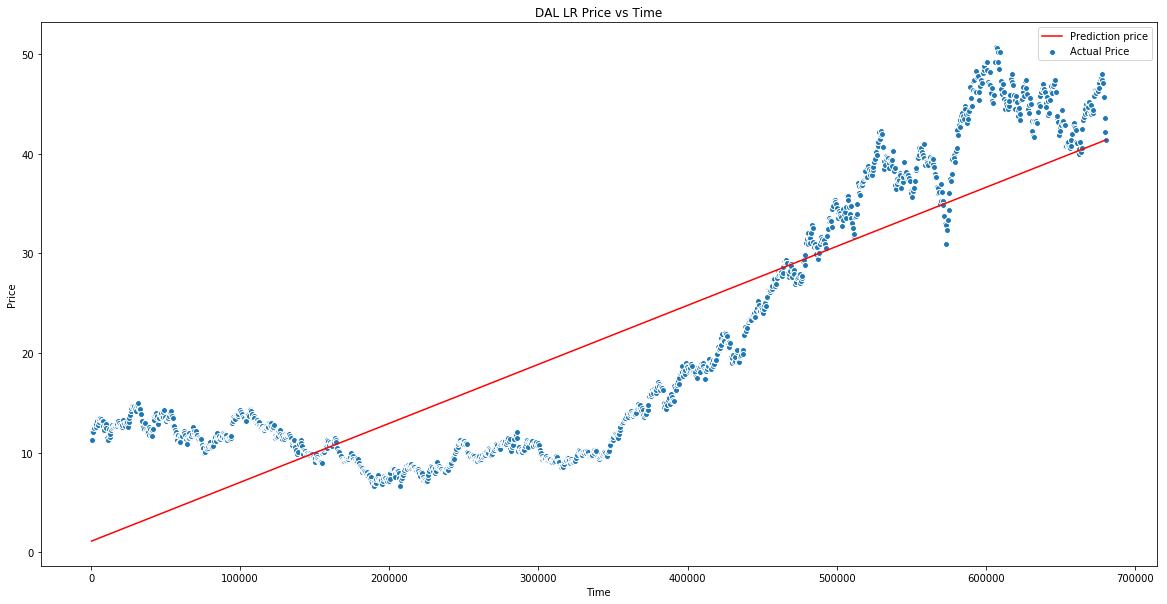

DAL regression score: 
 0.7420795954486198
DAL MSE: 
 46.85372751109154
CPU times: user 654 ms, sys: 37.7 ms, total: 691 ms
Wall time: 682 ms


In [43]:
%%time
plt.figure(1, figsize=(20,10))
plt.scatter(DAL_trainx, DAL_data_trainy, edgecolor='w', label='Actual Price')
plt.plot(DAL_trainx, DAL_train_prediction, color='r', label='Prediction price')
plt.xlabel('Time')
plt.ylabel('Price')

plt.title('DAL LR Price vs Time')
plt.legend()
plt.show()

print('DAL regression score: \n',regression.score(DAL_trainx,DAL_data_trainy))
DAL_MAE = metrics.mean_absolute_error(DAL_train_Y1,DAL_train_prediction1)
DAL_MSE = mean_squared_error(DAL_train_Y1, DAL_train_prediction1)
print('DAL MSE: \n',DAL_MSE)

### 1.2 LR Short term prediction
To add more accuracy, we added multiple variables and feactures such as open price, high, low, volume of the data to predict the close price of the day

##### Data processing

In [44]:
AAL_data_trainx = AALtrain[['open','high','low','volume']]
AAL_data_testx = AALtest[['open','high','low','volume']]

ALK_data_trainx = ALKtrain[['open','high','low','volume']]
ALK_data_testx = ALKtest[['open','high','low','volume']]

DAL_data_trainx = DALtrain[['open','high','low','volume']]
DAL_data_testx = DALtest[['open','high','low','volume']]

UAL_data_trainx = UALtrain[['open','high','low','volume']]
UAL_data_testx = UALtest[['open','high','low','volume']]

LUV_data_trainx = LUVtrain[['open','high','low','volume']]
LUV_data_testx = LUVtest[['open','high','low','volume']]

In [45]:
# close price as our Y to predict
AAL_data_trainy = AALtrain[['close']]
AAL_data_testy = AALtest[['close']]

ALK_data_trainy = ALKtrain[['close']]
ALK_data_testy = ALKtest[['close']]

DAL_data_trainy = DALtrain[['close']]
DAL_data_testy = DALtest[['close']]

UAL_data_trainy = UALtrain[['close']]
UAL_data_testy = UALtest[['close']]

LUV_data_trainy = LUVtrain[['close']]
LUV_data_testy = LUVtest[['close']]

In [46]:
ALK_data_trainy

,close
275,8.717500
742,9.195000
1210,9.112500
1678,9.064999
2146,8.885000
...,...
678613,80.989998
679110,79.010002
679607,76.139999
680104,73.099998


### ALK 

In [47]:
regression = LinearRegression()
regression.fit(ALK_data_trainx, ALK_data_trainy)

LinearRegression()

In [48]:
print(regression.coef_)
print(regression.intercept_)

[[-5.67196487e-01  1.05656699e+00  5.04555356e-01 -4.42912174e-08]]
[0.05295199]


In [49]:
%%time
ALK_prediction = regression.predict(ALK_data_testx)
print(ALK_prediction)

[[74.74051726]
 [76.08134868]
 [75.95677905]
 [75.75944799]
 [75.05460726]
 [78.28582519]
 [78.9739555 ]
 [79.47901682]
 [80.75314543]
 [81.22393356]
 [81.76753524]
 [81.53752761]
 [81.32333536]
 [79.80060308]
 [79.59428043]
 [79.64332884]
 [79.11958486]
 [81.76733274]
 [79.902508  ]
 [79.89852615]
 [78.89711056]
 [80.58734899]
 [78.59066317]
 [77.88509229]
 [79.33723641]
 [79.65640469]
 [77.99603147]
 [80.96450594]
 [77.18879055]
 [76.021071  ]
 [76.41535932]
 [77.41727951]
 [77.85681091]
 [75.44008237]
 [74.08252449]
 [75.44786057]
 [74.78008569]
 [76.89449265]
 [76.5266687 ]
 [75.85218145]
 [75.79697777]
 [78.95806419]
 [79.25069693]
 [78.06135309]
 [76.08608423]
 [75.99824975]
 [76.98559291]
 [77.24910066]
 [76.39139598]
 [76.92774113]
 [77.21258349]
 [78.30957861]
 [76.99984044]
 [78.19390801]
 [77.79069301]
 [77.09660098]
 [76.31602661]
 [76.22061305]
 [78.82525203]
 [77.41306332]
 [79.12355009]
 [81.53301745]
 [80.89716775]
 [78.54465742]
 [79.36475794]
 [79.80483269]
 [79.55101

In [50]:
ALK_prediction1 = ALK_prediction.flatten()
print(ALK_prediction1)
print(ALK_prediction1.shape)

[74.74051726 76.08134868 75.95677905 75.75944799 75.05460726 78.28582519
 78.9739555  79.47901682 80.75314543 81.22393356 81.76753524 81.53752761
 81.32333536 79.80060308 79.59428043 79.64332884 79.11958486 81.76733274
 79.902508   79.89852615 78.89711056 80.58734899 78.59066317 77.88509229
 79.33723641 79.65640469 77.99603147 80.96450594 77.18879055 76.021071
 76.41535932 77.41727951 77.85681091 75.44008237 74.08252449 75.44786057
 74.78008569 76.89449265 76.5266687  75.85218145 75.79697777 78.95806419
 79.25069693 78.06135309 76.08608423 75.99824975 76.98559291 77.24910066
 76.39139598 76.92774113 77.21258349 78.30957861 76.99984044 78.19390801
 77.79069301 77.09660098 76.31602661 76.22061305 78.82525203 77.41306332
 79.12355009 81.53301745 80.89716775 78.54465742 79.36475794 79.80483269
 79.55101495 80.73602479 82.38527773 81.23782538 85.06259261 86.34288783
 85.13880038 85.00107383 84.89060505 82.20054125 81.92878227 81.85952831
 81.7659918  82.93297005 81.32315924 82.49985749 80.3

In [51]:
ALKY = ALK_data_testy.values
ALKY

array([[76.32    ],
       [76.239998],
       [75.809998],
       [74.860001],
       [74.800003],
       [78.830002],
       [78.07    ],
       [78.580002],
       [81.239998],
       [81.769997],
       [81.290001],
       [81.870003],
       [80.739998],
       [79.739998],
       [79.129997],
       [79.690002],
       [78.739998],
       [82.089996],
       [78.650002],
       [80.07    ],
       [78.980003],
       [80.699997],
       [78.110001],
       [78.379997],
       [79.449997],
       [80.230003],
       [79.260002],
       [80.910004],
       [74.529999],
       [75.970001],
       [75.760002],
       [75.919998],
       [77.989998],
       [73.919998],
       [73.449997],
       [75.980003],
       [75.830002],
       [76.870003],
       [76.489998],
       [74.730003],
       [75.970001],
       [79.089996],
       [79.160004],
       [77.949997],
       [75.190002],
       [75.769997],
       [76.25    ],
       [77.129997],
       [77.68    ],
       [77.410004],


In [52]:
ALK_Y1 = ALKY.flatten()
ALK_Y1.shape

(341,)

In [53]:
ALKprice_comparison = pd.DataFrame({'ALK actual price':ALK_Y1,'ALK prediction':ALK_prediction1})
ALKprice_comparison.head(30)

,ALK actual price,ALK prediction
0,76.320000,74.740517
1,76.239998,76.081349
2,75.809998,75.956779
3,74.860001,75.759448
4,74.800003,75.054607
5,78.830002,78.285825
6,78.070000,78.973955
7,78.580002,79.479017
8,81.239998,80.753145
9,81.769997,81.223934


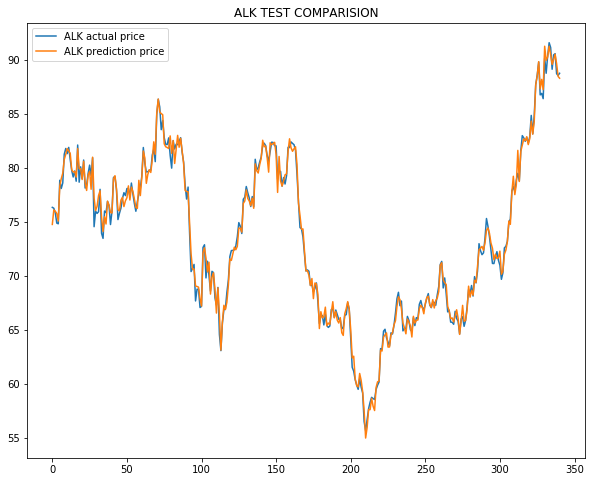

MSE: 
 0.3855374341267056


In [54]:
plt.figure()
plt.title('ALK TEST COMPARISION')
plt.plot(ALK_Y1, label='ALK actual price')
plt.plot(ALK_prediction1, label='ALK prediction price')
plt.legend()
plt.show()

MSE = mean_squared_error(ALK_Y1, ALK_prediction1)
print('MSE: \n',MSE)


In [55]:
MSE = mean_squared_error(ALK_Y1, ALK_prediction1)
print('MSE: \n',MSE)


MSE: 
 0.3855374341267056


### AAL

In [56]:
%%time
regression = LinearRegression()
regression.fit(AAL_data_trainx, AAL_data_trainy)
print(regression.coef_)
print(regression.intercept_)

AAL_prediction = regression.predict(AAL_data_testx)
AAL_prediction1 = AAL_prediction.flatten()
AALY = AAL_data_testy.values
AAL_Y1 = AALY.flatten()
AAL_Y1.shape

AALprice_comparison = pd.DataFrame({'AAL actual price':AAL_Y1,'AAL prediction':AAL_prediction1})
AALprice_comparison.head(30)

[[-5.98857896e-01  8.48029059e-01  7.49712942e-01 -5.25262611e-10]]
[-0.01675633]
CPU times: user 8.44 ms, sys: 1.41 ms, total: 9.85 ms
Wall time: 11.2 ms


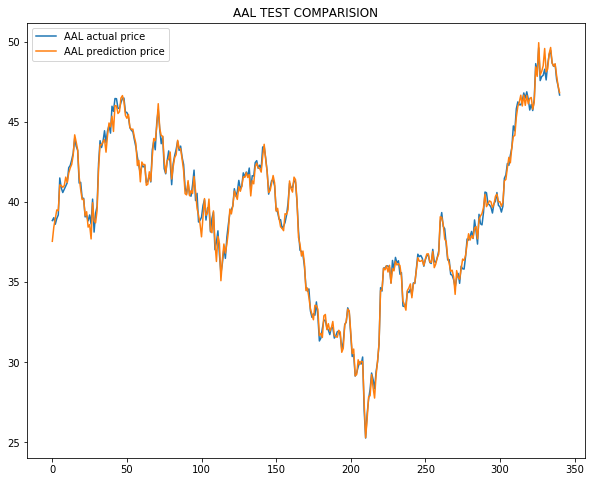

MSE: 
 0.12766077949526056
CPU times: user 362 ms, sys: 19.9 ms, total: 382 ms
Wall time: 509 ms


In [57]:
%%time
plt.figure()
plt.title('AAL TEST COMPARISION')
plt.plot(AAL_Y1, label='AAL actual price')
plt.plot(AAL_prediction1, label='AAL prediction price')
plt.legend()
plt.show()


MAE = metrics.mean_absolute_error(AAL_Y1,AAL_prediction1)
MSE = mean_squared_error(AAL_Y1, AAL_prediction1)
print('MSE: \n',MSE)

### LUV

In [58]:
%%time
regression = LinearRegression()
regression.fit(LUV_data_trainx, LUV_data_trainy)
print(regression.coef_)
print(regression.intercept_)

LUV_prediction = regression.predict(LUV_data_testx)
LUV_prediction1 = LUV_prediction.flatten()
LUVY = LUV_data_testy.values
LUV_Y1 = LUVY.flatten()
LUV_Y1.shape

LUVprice_comparison = pd.DataFrame({'LUV actual price':LUV_Y1,'LUV prediction':LUV_prediction1})
LUVprice_comparison.head(30)

[[-5.78241549e-01  8.93839989e-01  6.82221791e-01 -5.39473743e-09]]
[0.03902459]
CPU times: user 10.4 ms, sys: 1.63 ms, total: 12 ms
Wall time: 12.7 ms


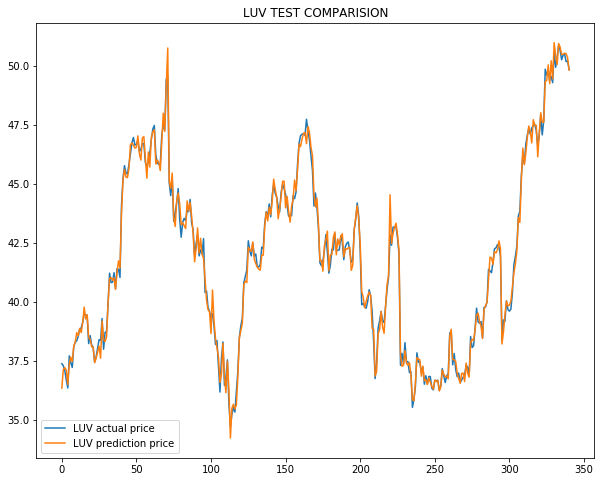

MSE: 
 0.10459644902090237


In [59]:
plt.figure()
plt.title('LUV TEST COMPARISION')
plt.plot(LUV_Y1, label='LUV actual price')
plt.plot(LUV_prediction1, label='LUV prediction price')
plt.legend()
plt.show()


MAE = metrics.mean_absolute_error(LUV_Y1,LUV_prediction1)
MSE = mean_squared_error(LUV_Y1, LUV_prediction1)
print('MSE: \n',MSE)

### UAL

In [60]:
%%time
regression = LinearRegression()
regression.fit(UAL_data_trainx, UAL_data_trainy)
print(regression.coef_)
print(regression.intercept_)

UAL_prediction = regression.predict(UAL_data_testx)
UAL_prediction1 = UAL_prediction.flatten()
UALY = UAL_data_testy.values
UAL_Y1 = UALY.flatten()
UAL_Y1.shape

UALprice_comparison = pd.DataFrame({'UAL actual price':UAL_Y1,'UAL prediction':UAL_prediction1})
UALprice_comparison.head(30)

[[-5.58909512e-01  8.13294628e-01  7.44219977e-01 -3.69052466e-09]]
[0.01328729]
CPU times: user 15.9 ms, sys: 2.44 ms, total: 18.3 ms
Wall time: 21 ms


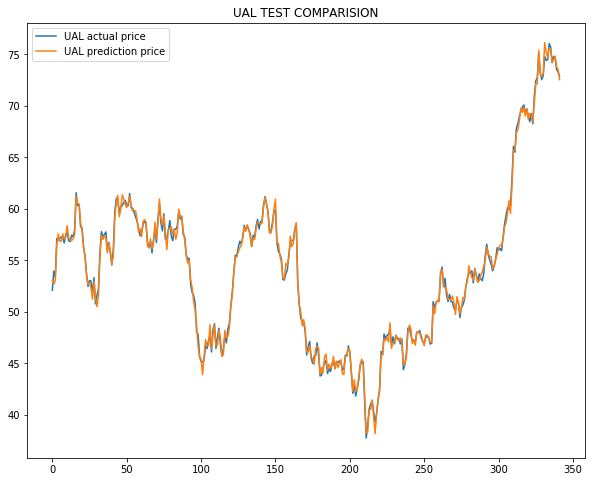

MSE: 
 0.20072259089630298


In [61]:
plt.figure()
plt.title('UAL TEST COMPARISION')
plt.plot(UAL_Y1, label='UAL actual price')
plt.plot(UAL_prediction1, label='UAL prediction price')
plt.legend()
plt.show()

MSE = mean_squared_error(UAL_Y1, UAL_prediction1)
print('MSE: \n',MSE)

### DAL

In [62]:
%%time
regression = LinearRegression()
regression.fit(DAL_data_trainx, DAL_data_trainy)
print(regression.coef_)
print(regression.intercept_)

DAL_prediction = regression.predict(DAL_data_testx)
DAL_prediction1 = DAL_prediction.flatten()
DALY = DAL_data_testy.values
DAL_Y1 = DALY.flatten()
DAL_Y1.shape

DALprice_comparison = pd.DataFrame({'DAL actual price':DAL_Y1,'DAL prediction':DAL_prediction1})
DALprice_comparison.head(30)

[[-5.77964351e-01  9.51194340e-01  6.23519686e-01 -2.22879903e-09]]
[-0.01329029]
CPU times: user 12 ms, sys: 337 µs, total: 12.3 ms
Wall time: 19.2 ms


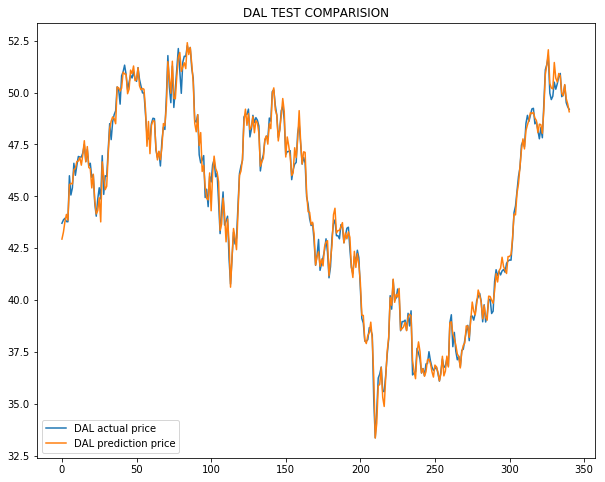

MSE: 
 0.13298588556549287


In [63]:
plt.figure()
plt.title('DAL TEST COMPARISION')
plt.plot(DAL_Y1, label='DAL actual price')
plt.plot(DAL_prediction1, label='DAL prediction price')
plt.legend()
plt.show()

MSE = mean_squared_error(DAL_Y1, DAL_prediction1)
print('MSE: \n',MSE)